In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [3]:
df = df.drop('timestamp', axis=1)
df.head(2)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0


In [4]:
# ## choose a random lines from the dataframe

# samp_ = df.sample(5)
# users = samp_['userId'].values
# movies = samp_['movieId'].values
# ratings = samp_['rating'].values

In [5]:
matrix = pd.pivot_table(df, values='rating', index='userId', columns='movieId')


In [6]:
## cria a matriz B
b = matrix.copy()


In [7]:
## substitui um elemento aleatório que não seja NAN da matriz B por um valor aleatorio de 0 a 5.\n",
i = np.random.randint(0, b.shape[0])
j = np.random.randint(0, b.shape[1])
while np.isnan(b.iloc[i, j]):
    i = np.random.randint(0, b.shape[0])
    j = np.random.randint(0, b.shape[1])
print(i, j)
print(b.iloc[i, j])
b.iloc[i, j] = np.random.randint(5, 51)/10
print(b.iloc[i, j])

563 1448
5.0
3.6


In [8]:
## substitui os NANs da matriz B por 2.5
b = b.fillna(2.75)

In [9]:
b = b.to_numpy()

In [10]:
def selecionar_K_primeiros_valores (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,0:K]
    s_ = s[:K]
    vt_ = vt[:K,:]
    return u_, s_, vt_

In [11]:
from scipy.linalg import svd, diagsvd

## calcula a SVD da matriz B
U, s, Vt = svd(b)


In [12]:
import matplotlib.pyplot as plt


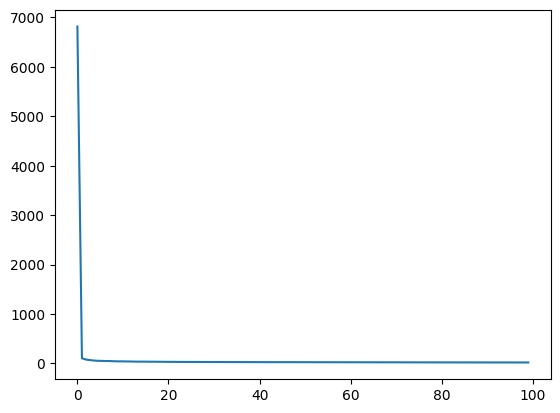

In [13]:
plt.plot(s[:100])
plt.show()

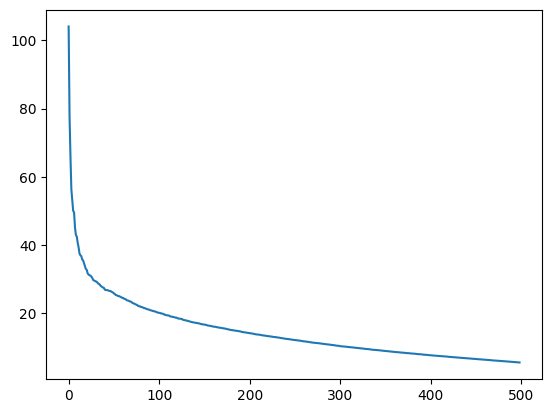

In [14]:
## plot the s values
plt.plot(s[1:500])
plt.show()

In [15]:
#retira os K ultimos valores das matrizes U, s e Vt

U_, s_, Vt_ = selecionar_K_primeiros_valores(U, s, Vt, 25)

In [16]:
## reconstrói a matriz B com a retirada do ruido a partir da SVD
B_ = U_ @ diagsvd(s_, U_.shape[1], Vt_.shape[0]) @ Vt_

# ## compara o valor da matriz original, da matriz B e da matriz B_ (com ruido retirado)
# for i in range(len(ratings)):
#     print(f"valor_original{i} : {ratings[i]}")
#     print(f"valor ruidoso: {i} : {b[users[i], movies[i]]}")
#     print(f"valor apos retirada do ruido{i} : {B_[users[i], movies[i]]}")
#     print(f"diferenca{i}: {b[users[i], movies[i]] - B_[users[i], movies[i]]}")
print(matrix.iloc[i, j])
print(b[i, j])
print(B_[i, j])




5.0
3.6
3.5814289380120083


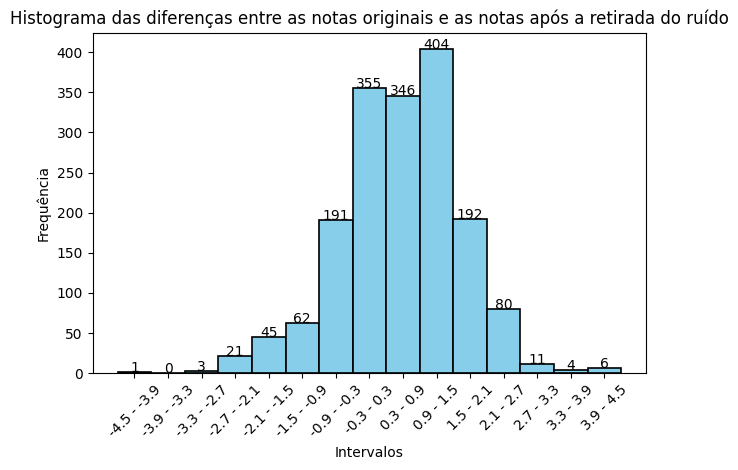

In [34]:
import matplotlib.pyplot as plt

# Função para ler os valores do arquivo txt
def read_values_from_file(file_path):
    with open(file_path, 'r') as file:
        values = [float(line.strip()) for line in file.readlines()]
    return values

# Intervalos desejados para o histograma
bin_edges = [-4.5,-3.9,-3.3,-2.7,-2.1 ,-1.5 ,-0.9, -0.3, 0.3, 0.9, 1.5, 2.1, 2.7, 3.3, 3.9, 4.5]

# Função para criar o histograma
def create_histogram(values, bin_edges):
    n, bins, patches = plt.hist(values, bins=bin_edges, color='skyblue', edgecolor='black', linewidth=1.2)
    
    # Adiciona rótulos personalizados ao eixo x
    bin_labels = []
    for i in range(len(bin_edges) - 1):
        bin_labels.append(f"{bin_edges[i]} - {bin_edges[i+1]}")
    
    plt.xticks([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)], bin_labels, rotation=45)

    # Adiciona anotações com os valores acima de cada bin
    for i in range(len(bins) - 1):
        plt.text((bins[i] + bins[i + 1]) / 2, n[i] + 0.1, int(n[i]), ha='center', fontsize=10)

    plt.xlabel('Intervalos')
    plt.ylabel('Frequência')
    plt.title('Histograma das diferenças entre as notas originais e as notas após a retirada do ruído')
    plt.tight_layout()
    plt.show()

file_path = 'diferenças.txt'

values = read_values_from_file(file_path)
# Cria e exibe o histograma
create_histogram(values, bin_edges)


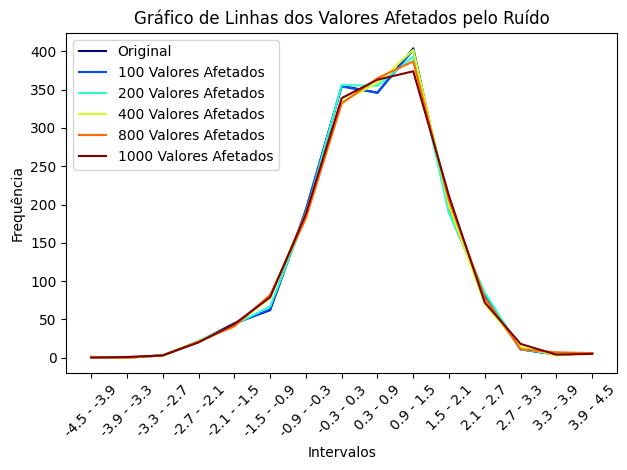

In [43]:
import matplotlib.pyplot as plt
import random
import numpy as np

def add_noise(values, n_noise):
    noisy_values = values.copy()
    for _ in range(n_noise):
        idx = random.randint(0, len(noisy_values) - 1)
        noise = random.uniform(-0.5, 0.5)
        noisy_values[idx] += noise
    return noisy_values

def create_line_plot(values, bin_edges, color, label):
    n, bins = np.histogram(values, bins=bin_edges)
    bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
    plt.plot(bin_centers, n, color=color, label=label)

def stress_test_line_plot(values, bin_edges, noise_levels):
    colors = plt.cm.jet(np.linspace(0, 1, len(noise_levels) + 1))
    create_line_plot(values, bin_edges, colors[0], 'Original')

    for i, n_noise in enumerate(noise_levels):
        noisy_values = add_noise(values, n_noise)
        create_line_plot(noisy_values, bin_edges, colors[i+1], f'{n_noise} Valores Afetados')

    
    bin_labels = []
    for i in range(len(bin_edges) - 1):
        bin_labels.append(f"{bin_edges[i]} - {bin_edges[i+1]}")
    plt.xticks([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)], bin_labels, rotation=45)

    plt.xlabel('Intervalos')
    plt.ylabel('Frequência')
    plt.title('Gráfico de Linhas dos Valores Afetados pelo Ruído')
    plt.legend()
    plt.tight_layout()
    plt.show()

file_path = 'diferenças.txt'
values = read_values_from_file(file_path)

# Intervalos desejados para o histograma
bin_edges = [-4.5,-3.9,-3.3,-2.7,-2.1 ,-1.5 ,-0.9, -0.3, 0.3, 0.9, 1.5, 2.1, 2.7, 3.3, 3.9, 4.5]
# Níveis de ruído
noise_levels = [100, 200, 400, 800, 1000]

stress_test_line_plot(values, bin_edges, noise_levels)

